<a href="https://colab.research.google.com/github/juathanduarte/cncomp/blob/main/Relat%C3%B3rio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Relatório 1**
##Cálculo Numérico Computacional - T2

> **Nome:** Juathan Coelho Duarte

> **Matrícula:** 19200989

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

#**Métodos**

###**Bissecção**

In [54]:
def bisect(m, a, b, precision):
    if m(a) * m(b) >= 0:
        print("Bisseção falhou")
        return None
    
    counter = 0
    k = (a + b) / 2
    
    while abs(m(k)) >= precision:
        k = (a + b) / 2
        if m(k) == 0:
            return k
        if m(a) * m(k) < 0:
            b = k
        else:
            a = k
        
        counter += 1
    
        arrayX.append(k)
        arrayY.append(m(k))
  
    print("\nBissecção | Iterações: " + str(counter))
    return k

###**Falsa Posição**

In [55]:
def falsePosition(f, a, b, precision):
    if (f(a) * f(b) > 0):
        print("\nFalsa posição | Falhou")
        return None
    
    counter = 0
    
    while abs(b - a) > precision:
        x = (a * f(b) - b * f(a)) / (f(b) - f(a))
        if (f(a) * f(x) < 0):
            b = x
        else:
            a = x
        
        counter += 1
        arrayX.append(x)
        arrayY.append(f(x))
    
    print("\nFalsa posição | Iterações: " + str(counter))
    return x

###**Newton Raphson**

In [56]:
def newtonRaphson(f, x0, precision):    
    if(abs(f(x0)) < precision):
        print("Newton Raphson falhou")
        return None
    
    counter = 0
    k = x0 - f(x0)/f1(x0)
    
    while abs(f(x0)) >= precision:
        x0 = k
        k = x0 - f(x0)/f1(x0)
        
        counter += 1
        
        arrayX.append(k)
        arrayY.append(f(k))
        
    print("\nNewton Raphson | Iterações: " + str(counter))
    return x0

###**Secante**

In [57]:
def secante(f, x0, x1, precision):
    if(abs(f(x0)) < precision) or (abs(f(x1)) < precision):
        print("Secante falhou")
        return None
    
    counter = 0
    
    while abs(f(x1)) >= precision or abs(f(x0)) >= precision:
        x2 = x1 - (f(x1) / (f(x1) - f(x0)) * (x1 - x0))
        
        x0 = x1
        x1 = x2      
        counter += 1
        
        arrayX.append(x2)
        arrayY.append(f(x2)) 
    
    print("\nSecante | Iterações: " + str(counter))
    return x1

###**Gráfico**

In [58]:
def showGraphic(f, title, x1_start, x1_end, x2_start, x2_end, arrayX, arrayY):
    plt.figure(figsize=(10,10))
    plt.suptitle(title, fontsize="16")
    
    plt.subplot(2, 1, 1)
    curva = np.linspace(x1_start, x1_end, 100)
    valores = [f(x) for x in curva]
    plt.plot(curva, valores, linestyle='-')
    if (arrayX != "NotPoint"):
        plt.plot(arrayX, arrayY, 'ro')
    plt.title(' X = [' + str(x1_start) + ', ' + str(x1_end) + ']')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(y=0, color='red')
    plt.grid()
    
    plt.subplot(2, 1, 2)
    curva = np.linspace(x2_start, x2_end, 100)
    valores = [f(x) for x in curva]
    plt.plot(curva, valores, linestyle='-')
    if (arrayY != "NotPoint"):
        plt.plot(arrayX, arrayY, 'ro')
    plt.title(' X = [' + str(x2_start) + ', ' + str(x2_end) + ']')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(y=0, color='red')
    plt.grid()
    
    plt.show()

#**Exercícios**

###**Exercício 1**

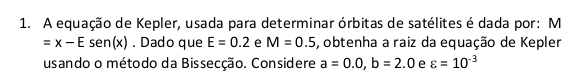


Bissecção | Iterações: 10
------------------------------
Bissecção | Raiz aproximada: 0.615234375



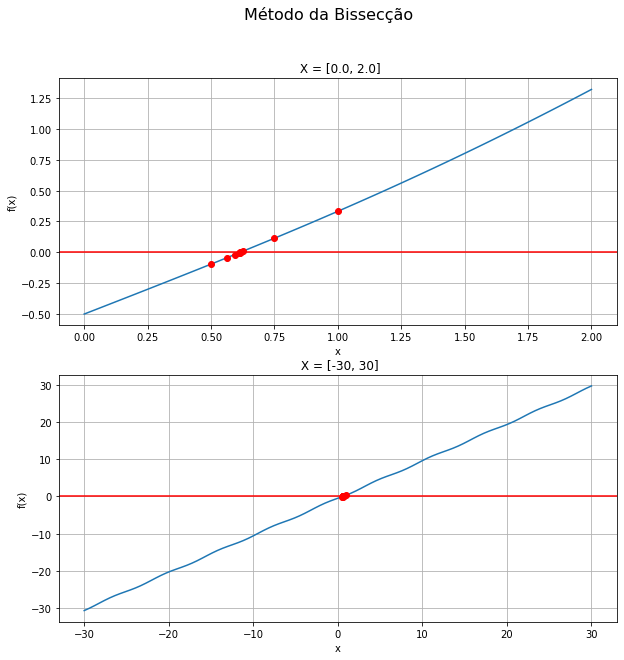

In [14]:
m = lambda x: x - 0.2 * np.sin(x) - 0.5
a = 0.0
b = 2.0
precision = 10**(-3)

arrayX = []
arrayY = []

print(f"" + 30 * "-" + "\n" + "Bissecção | Raiz aproximada: " + str(bisect(m, a, b, precision)) + "\n")

showGraphic(m, "Método da Bissecção", a, b, -30, 30, arrayX, arrayY)

###**Exercício 2**

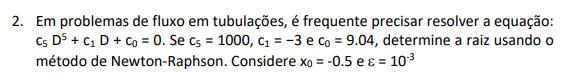


Newton Raphson | Iterações: 4
------------------------------
Newton Raphson | Raiz aproximada: -0.4000000658024373



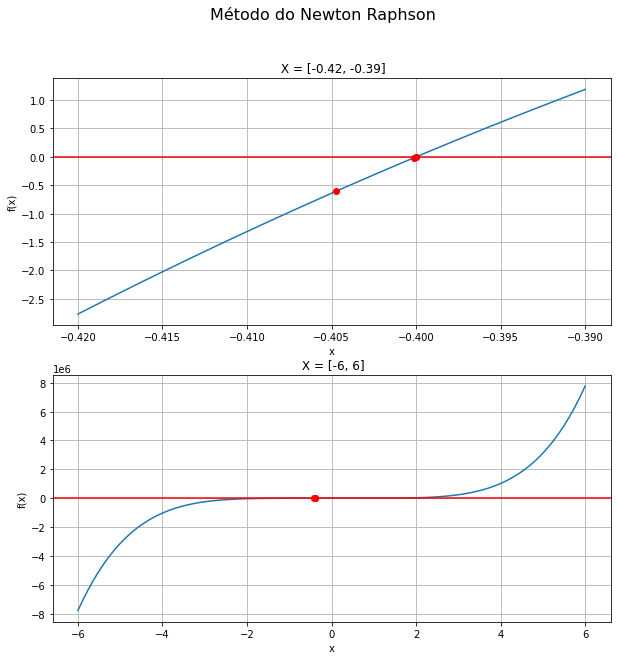

In [60]:
d = Symbol('x')
f = 1000 * d**5 + (-3) * d + 9.04
x0 = -0.5
precision = 10**(-3)

df = f.diff(d)
f1 = lambdify(d, df)
f = lambdify(d, f)

arrayX = []
arrayY = []
    
print(f"" + 30 * "-" + "\n" + "Newton Raphson | Raiz aproximada: " + str(newtonRaphson(f, x0, precision)) + "\n")

showGraphic(f, "Método do Newton Raphson", -0.42, -0.39, -6, +6, arrayX, arrayY)


###**Exercício 3**

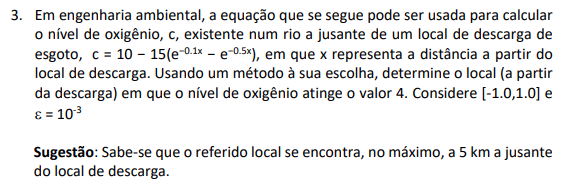

Bisseção falhou
------------------------------
Bissecção | Raiz aproximada: None


Falsa posição | Falhou
------------------------------
Falsa posição | Raiz aproximada: None


Newton Raphson | Iterações: 4
------------------------------
Newton Raphson | Raiz aproximada: 1.579964721199905


Secante | Iterações: 5
------------------------------
Secante | Raiz aproximada: 1.5799643350730537



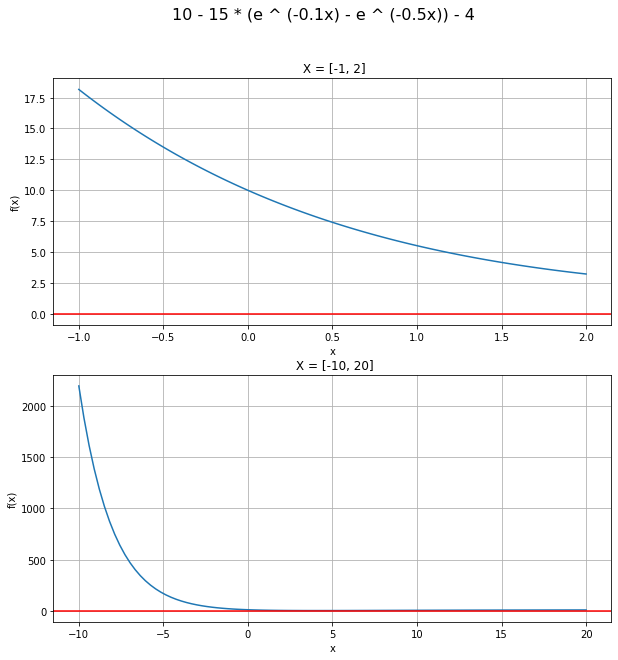

In [61]:
c_V1 = lambda x: 10 - 15 * (np.exp(-0.1 * x) - np.exp(-0.5 * x))
a_V1 = -1.0
b_V1 = 1.0
precision_V1 = 10**(-3)

x = Symbol('x')
f = 10 - 15 * (math.e ** (-0.1 * x) - math.e ** (-0.5 * x)) - 4
x0 = -1
x1 = 1
precision = 10**(-3)
df = f.diff(x)
f1 = lambdify(x, df)
f = lambdify(x, f)

arrayX = []
arrayY = []

print(f"" + 30 * "-" + "\n" + "Bissecção | Raiz aproximada: " + str(bisect(c_V1, a_V1, b_V1, precision_V1)) + "\n")
print(f"" + 30 * "-" + "\n" + "Falsa posição | Raiz aproximada: " + str(falsePosition(c_V1, a_V1, b_V1, precision_V1)) + "\n")
print(f"" + 30 * "-" + "\n" + "Newton Raphson | Raiz aproximada: " + str(newtonRaphson(f, 0.5, 10**(-4))) + "\n")
print(f"" + 30 * "-" + "\n" + "Secante | Raiz aproximada: " + str(secante(f, x0, x1, precision)) + "\n")
showGraphic(c_V1, "10 - 15 * (e ^ (-0.1x) - e ^ (-0.5x)) - 4", -1, 2, -10, 20, "NotPoint", "NotPoint")


> Em situações extremas, o método da secante encontra uma raiz fora do intervalo de interesse.

###**Exercício 4**

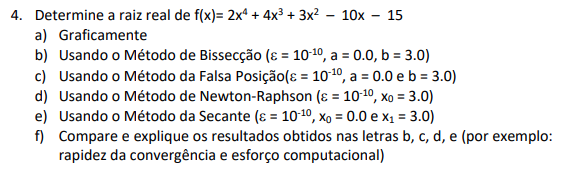

In [30]:
fx = lambda x: 2 * x**4 + 4 * x**3 + 3 * x**2 - 10 * x - 15
a = 0.0
b = 3.0
precision = 10**(-10)

x = Symbol('x')
f = 2 * x**4 + 4 * x**3 + 3 * x**2 - 10 * x - 15
x0 = 3.0
precision = 10**(-10)
df = f.diff(x)
f1 = lambdify(x, df)
f = lambdify(x, f)

**a)** Graficamente

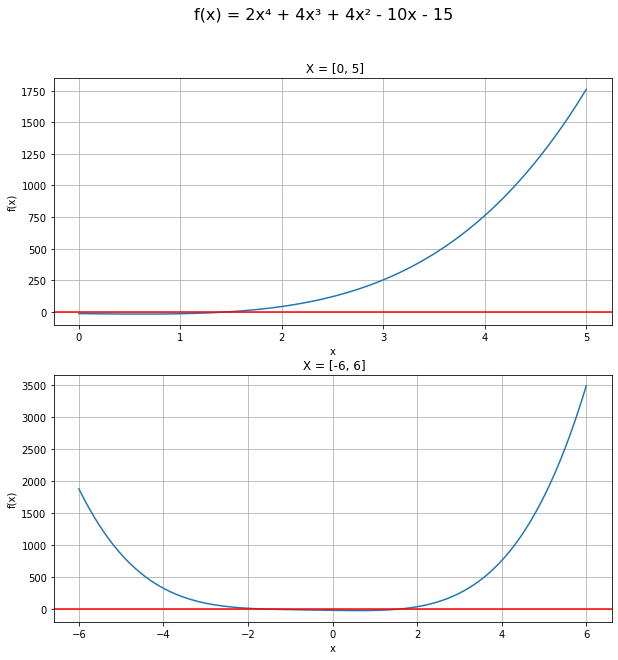

In [31]:
showGraphic(fx, "f(x) = 2x⁴ + 4x³ + 4x² - 10x - 15", 0, 5, -6, 6, "NotPoint", "NotPoint")

**b)** Usando o Método de Bissecção ($ε = 10^{⁻10}$, $a = 0.0$, $b = 3.0$).


Bissecção | Iterações: 38
------------------------------
Bissecção | Raiz aproximada: 1.492878708664648



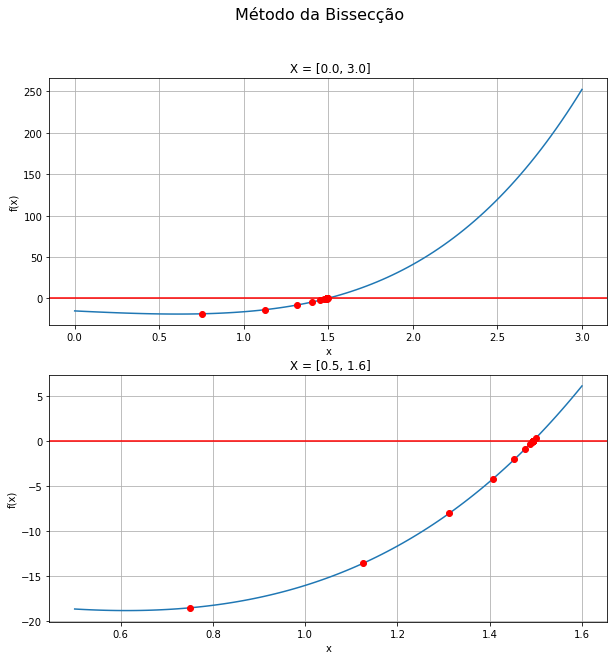

In [32]:
arrayX = []
arrayY = []

print(f"" + 30 * "-" + "\n" + "Bissecção | Raiz aproximada: " + str(bisect(fx, a, b, precision)) + "\n")
showGraphic(fx, "Método da Bissecção", a, b, 0.5, 1.6, arrayX, arrayY)

**c)** Usando o Método da Falsa Posição ($ε = 10^{⁻10}$, $a = 0.0$, $b = 3.0$).


Falsa posição | Iterações: 100
------------------------------
Falsa Posição | Raiz aproximada: 1.492878708663604



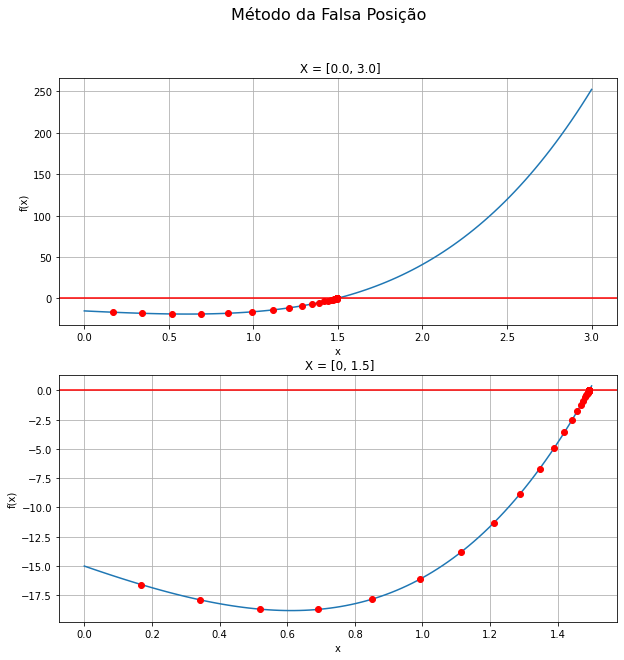

In [33]:
arrayX = []
arrayY = []

print(f"" + 30 * "-" + "\n" + "Falsa Posição | Raiz aproximada: " + str(falsePosition(fx, a, b, precision)) + "\n")
showGraphic(fx, "Método da Falsa Posição", a, b, 0, 1.5, arrayX, arrayY)

**d)** Usando o Método de Newton-Raphson ($ε = 10^{⁻10}$, $x_0 = 3.0$).


Newton Raphson | Iterações: 7
------------------------------
Newton Raphson | Raiz aproximada: 1.4928787086636037



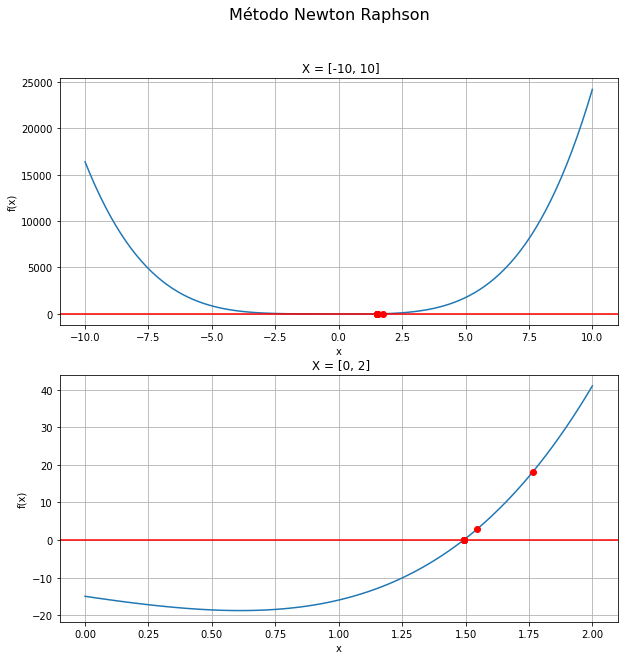

In [34]:
arrayX = []
arrayY = []

print(f"" + 30 * "-" + "\n" + "Newton Raphson | Raiz aproximada: " + str(newtonRaphson(f, x0, precision)) + "\n")
showGraphic(f, "Método Newton Raphson", -10, 10, 0, 2, arrayX, arrayY)

**e)** Usando o Método da Secante ($ε = 10^{⁻10}$, $x_0 = 0.0$, $x_1 = 3.0$).


Secante | Iterações: 11
------------------------------
Método Secante | Raiz aproximada: -1.3003841326439196
------------------------------


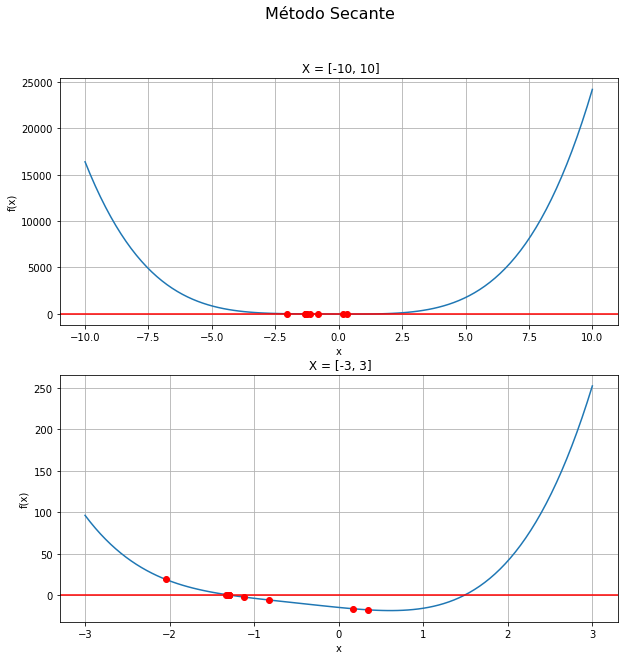

In [35]:
arrayX = []
arrayY = []

x0 = 0.0
x1 = 3.0

print(f"" + 30 * "-" + "\n" + "Método Secante | Raiz aproximada: " + str(secante(f, x0, x1, precision)) + "\n" + 30 * "-")
showGraphic(f, "Método Secante", -10, 10, -3, 3, arrayX, arrayY)

**f)** Compare e explique os resultados obtidos nas letras b, c, d, e (por exemplo: rapidez da convergência e esforço computacional).


> Levando em conta os resultados obtidos e plotados nos gráficos, o método Newton Raphson teve o melhor desempenho, com apenas 7 iterações, já o método Falsa Posição foi o mais lento, precisando de 100 iterações. Observando os gráfico, o método Secante convergiu a uma raiz diferente das encontradas utilizando os outros métodos.



###**Exercício 5**

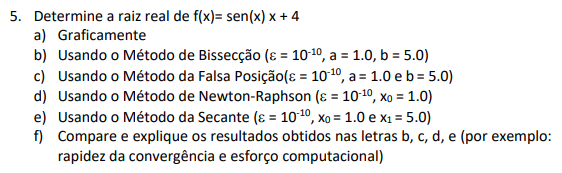

In [48]:
arrayX = []
arrayY = []

fx = lambda x: sin(x) * x + 4
a = 1.0
b = 5.0
precision = 10**(-10)

x = Symbol('x')
f = sin(x) * x + 4
x0 = 1.0
precision = 10**(-10)
df = f.diff(x)
f1 = lambdify(x, df)
f = lambdify(x, f)

**a)** Graficamente.

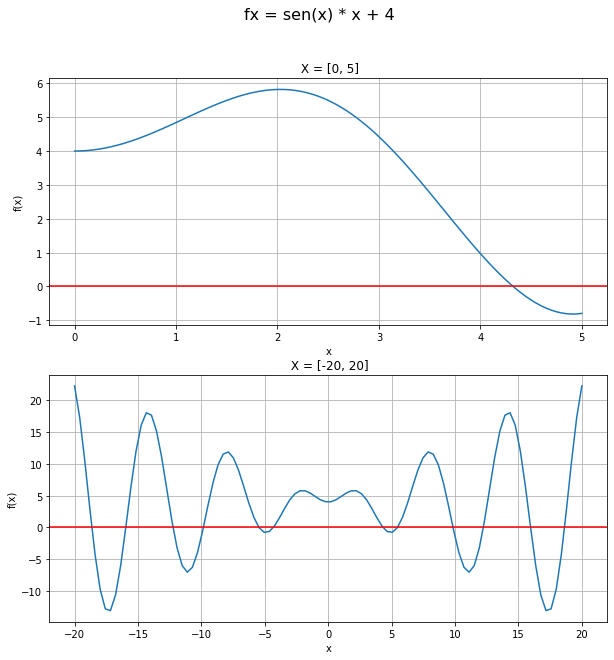

In [49]:
showGraphic(fx, "fx = sen(x) * x + 4", 0, 5, -20, 20, "NotPoint", "NotPoint")

**b)** Usando o Método de Bissecção ($ε = 10^{-10}$ , $a = 1.0$, $b = 5.0$).


Bissecção | Iterações: 34
------------------------------
Bissecção | Raiz aproximada: 4.323239543708041



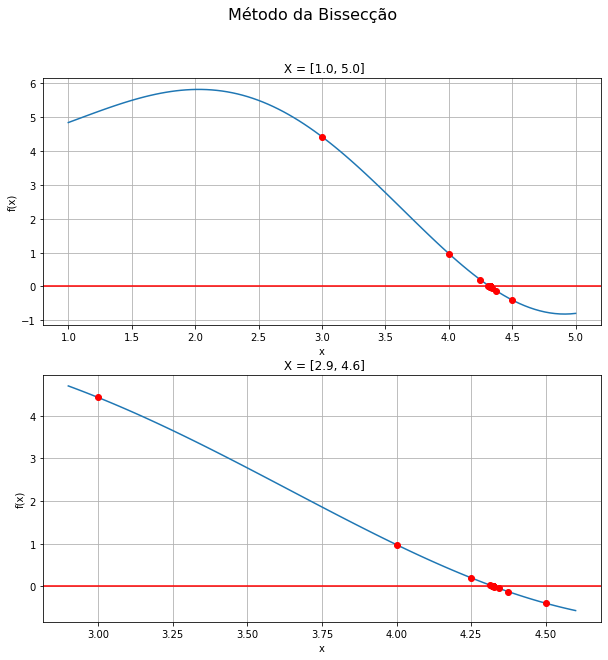

In [50]:
arrayX = []
arrayY = []

print(f"" + 30 * "-" + "\n" + "Bissecção | Raiz aproximada: " + str(bisect(fx, a, b, precision)) + "\n")
showGraphic(fx, "Método da Bissecção", a, b, 2.9, 4.6, arrayX, arrayY)

**c)** Usando o Método da Falsa Posição($ε = 10^{-10}$ , $a = 1.0$ e $b = 5.0$).


Falsa posição | Iterações: 14
------------------------------
Falsa Posição | Raiz aproximada: 4.32323954371371



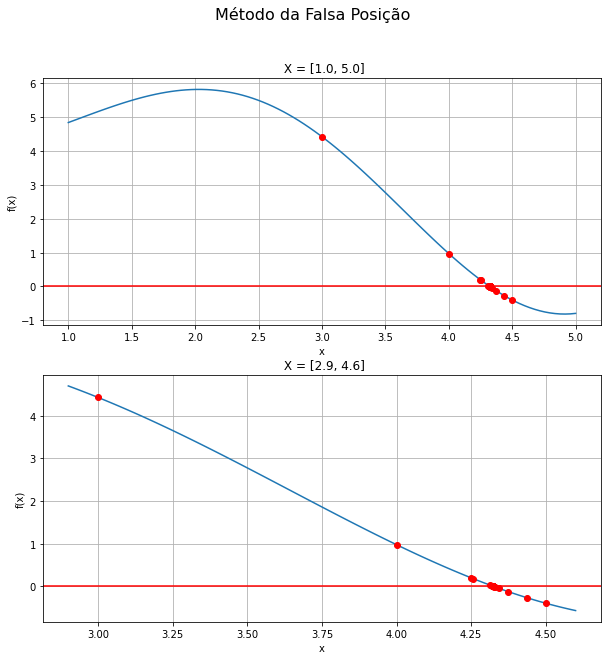

In [51]:
print(f"" + 30 * "-" + "\n" + "Falsa Posição | Raiz aproximada: " + str(falsePosition(fx, a, b, precision)) + "\n")
showGraphic(fx, "Método da Falsa Posição", a, b, 2.9, 4.6, arrayX, arrayY)

**d)** Usando o Método de Newton-Raphson ($ε = 10^{-10}$ , $x_0 = 1.0$).


Newton Raphson | Iterações: 7
------------------------------
Newton Raphson | Raiz aproximada: -5.461308012589076



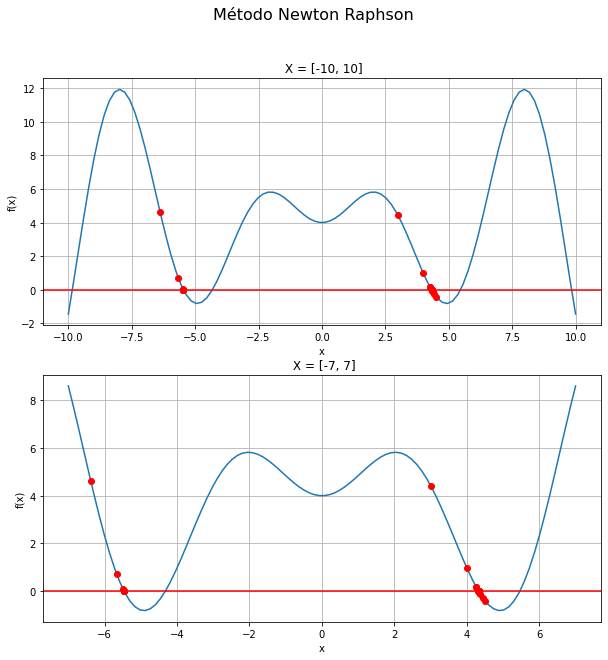

In [52]:
print(f"" + 30 * "-" + "\n" + "Newton Raphson | Raiz aproximada: " + str(newtonRaphson(f, x0, precision)) + "\n")
showGraphic(f, "Método Newton Raphson", -10, 10, -7, 7, arrayX, arrayY)

**e)** Usando o Método da Secante ($ε = 10^{-10}$ , $x_0 = 1.0$ e $x_1 = 5.0$)


Secante | Iterações: 8
------------------------------
Secante | Raiz aproximada: 4.323239543713714



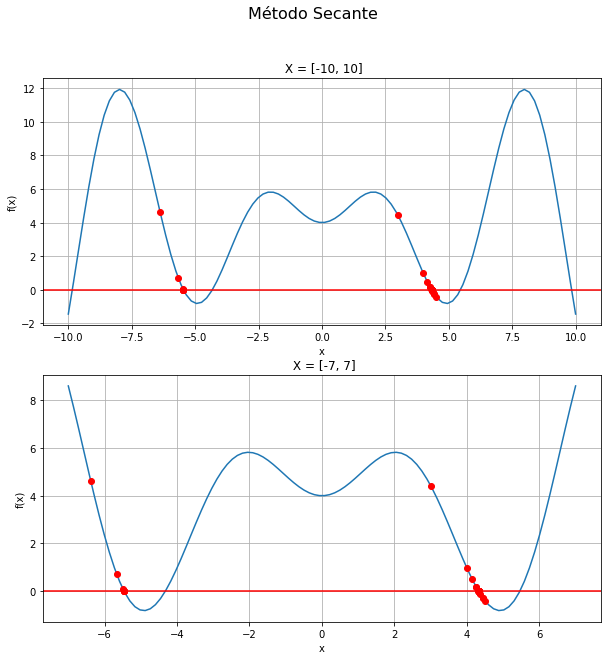

In [53]:
x0 = 1.0
x1 = 5.0

print(f"" + 30 * "-" + "\n" + "Secante | Raiz aproximada: " + str(secante(f, x0, x1, precision)) + "\n")
showGraphic(f, "Método Secante", -10, 10, -7, 7, arrayX, arrayY)

**f**) Compare e explique os resultados obtidos nas letras b, c, d, e.

> Levando em conta os resultados obtidos, podemos observar que o método de Newton Raphson teve o melhor desempenho, com apenas 7 iterações, em contraponto, o método da Bissecção foi o de pior desempenho, com 34 iterações pois a convergência é mais lenta, levando em consideração que a precisão é muito pequena 10$^{-10}$ assim o número tendendo a ser maior. O método da bissecção é usado para reduzir o intervalo antes de usar algum método mais eficiente, como o Newton Raphson que é o que demonstra ser o mais eficiente na maioria dos casos testados.

> Podemos verificar que o Método de Newton Raphson teve o melhor desempenho em ambas questões (4 e 5).